<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Deep_Photo_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Photo Style Transfer**

논문 링크: https://arxiv.org/abs/1703.07511

style transfer는 여러 문제점이 존재하는데 그 중 하나가 바로 **photorealism**에 관한 것이다. style transfer를 처음보면 잘 합성이 된거 같지만 무언가 좀 부족하다.

예를 들면, style transfer를 사용자가 제어할 수 없기 때문에 네트워크가 만들어주는대로 바라만 보고 있어야 한다. 이러다보면 content와 style사이에서 trade-off 관계가 생기는데, 이를 제어할 수 없기 때문에 하늘 content에 다른 건물 style이 입혀지는 등의 사례가 나온다.

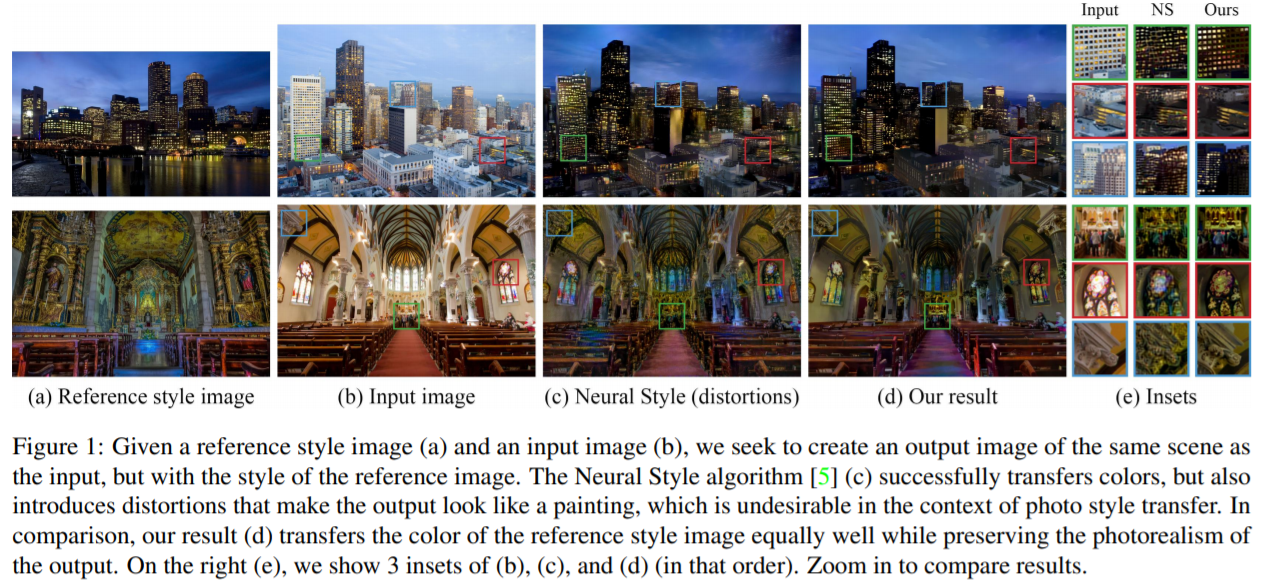

위의 그림 Figure 1을 보면 기존의 Neural Style algorithm도 성공적으로 style transfer을 진행하였지만, input image와 style image가 사진임에도 불구하고 그림처럼 보이며 직선 가장자리가 흔들리고 규칙적인 texture가 물결 모양이 되버리는 등 결과물에 왜곡이 생긴다. 반면 본 논문의 결과물은 photorealism이 잘 유지가 되면서 style transfer가 성공적으로 진행이 된다.

본 논문의 contribution은 두 가지가 있는데, 첫번째는 **Structure preservation**로 style transfer를 진행한 후에도 content image의 구조가 왜곡이 없이 더 정밀한 이미지를 만들어내는 것이다. 두번째는 **Semantic accuracy and transfer faithfulness**로 장면의 의미를 유지하는 것이다. 예를 들어 도시 풍경에서 건물의 외관은 건물과 일치해야하며 하늘과 하늘이 일치해야한다. 즉, 하늘이 건물처럼 보이게 하면 안된다.

## **Loss function**

### **Photorealism regularization**

창문과 같은 부분의 찌그러짐을 방지하기 위하여 photorealism regularization 기법에서 image distortion에 penalty를 주는 loss function L_m을 정의한다. 이때 **A Closed-Form Solution to Natural Image Matting**라는 논문에서 나오는 **image matting**이라는 개념을 활용한다. image matting을 간단히 설명하자면, foreground object를 뽑아내는 것이다. 다시말해 foreground object를 정확히 뽑는다는 것은 input과 output의 경계 모양이 일치한다는 것이다. 즉, 이를 가져와 적용함으로써 image distortion을 줄인다는 것이다.

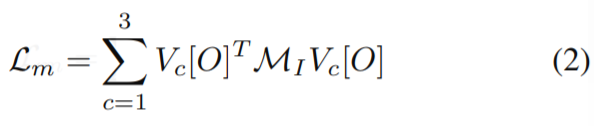

따라서 위의 식과 같이 loss function L_m을 추가하였다. 이때 matrix M_I는 Matting Laplacian이다.

### **Augmented style loss with semantic segmentation**

사진의 하늘 부분까지 창문의 style이 적용되는 것을 **spillover** 현상이라고 한다. 본 논문은 이를 해결하기 위해 semantic segmentation method를 적용하여 image를 label이 붙은 segmentation로 나눈다. 그 이후 feature map에 각 segment에 해당하는 semantic segmentation mask를 씌워서 Gram matrix를 구한다.

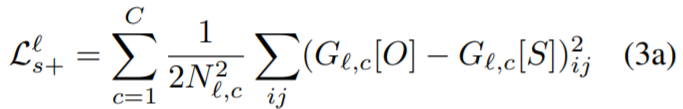

이를 식으로 나타내면 위와 같다. 위 식에서 C는 segment의 수를 의미한다.

### **Total loss**

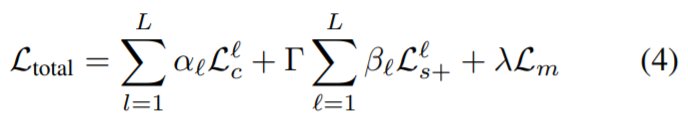

기존 content loss와 위에서 언급한 augmented style loss, photorealism regularization를 합치면 위의 식과 같이 된다.

## **Experiments**

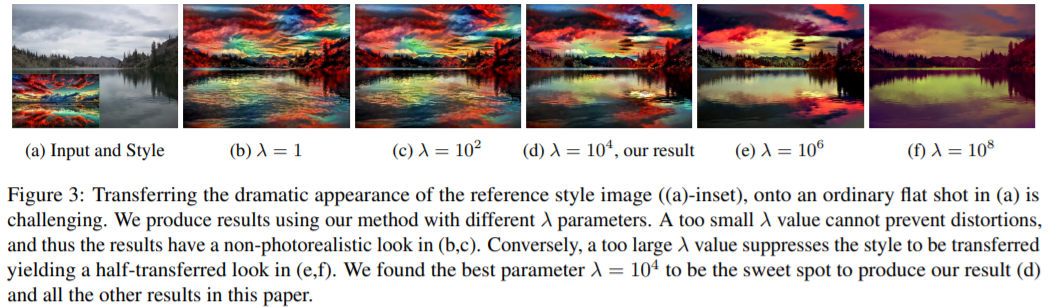

위의 그림 Figure 3을 보면 λ값에 따른 결과물을 볼 수 있다. λ값이 너무 작을 경우는 왜곡이 일어나는 것을 알 수 있으며 반대로 λ값이 너무 큰 경우는 style을 억제시켜 style transfer가 잘 진행이 되지 않는 것을 알 수 있다.

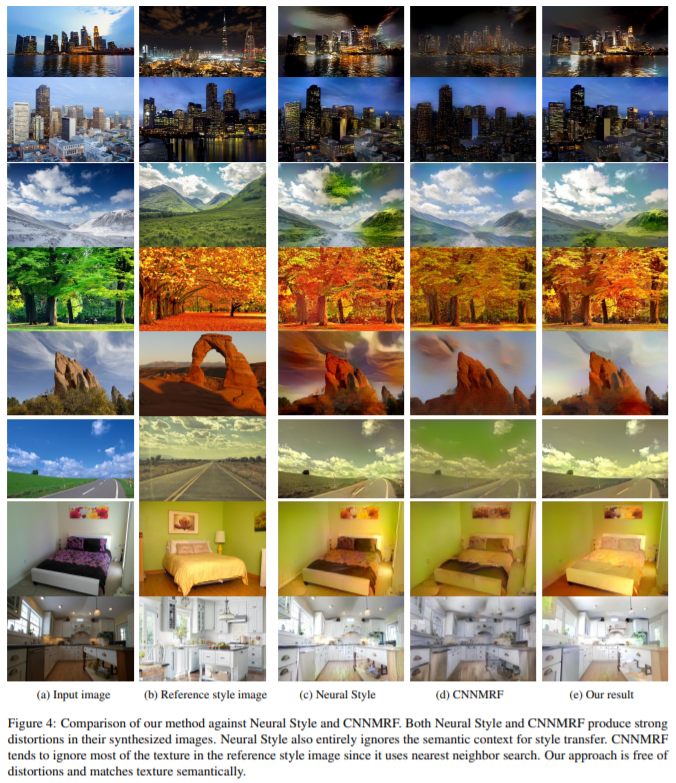

위의 그림 Figure 4는 input image (a)에 대해 style image (b)를 활용하여 style transfer한 것을 여러 기법들과 비교한 것이다. 먼저 (c)와 (d)의 경우 둘다 왜곡이 생기는 반면에 본 논문의 기법은 시각적으로 더 휼륭한 결과물을 도출해낸다.

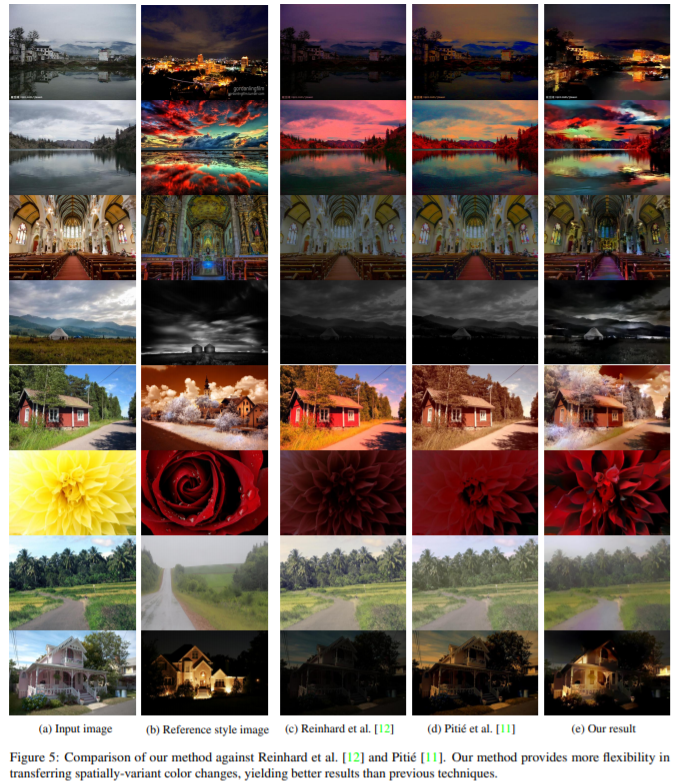

위의 그림 Figure 5는 input image (a)에 대해 style image (b)를 활용하여 style transfer한 것을 여러 기법들과 비교한 것이다. 본 논문의 결과물이 나머지 기법들보다 상황에 맞는 색상으로 잘 style transfer를 진행한 것을 알 수 있다.

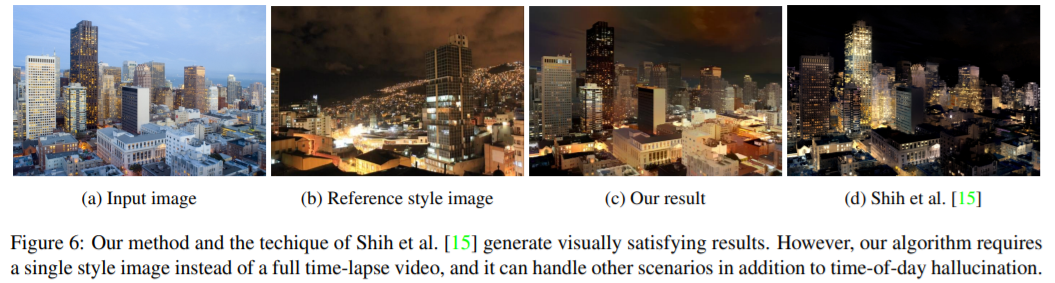

위의 그림 Figure 6도 본 논문의 기법과 Shih et al.의 기법과 비교한 것인데, 둘다 결과물은 만족스럽지만 본 논문의 기법은 사진이 한장만 있으면 충분한 반면에 Shih et al.의 경우는 full time-lapse 영상이 필요하기 때문에 실용성 부분에선 더 뛰어나다.

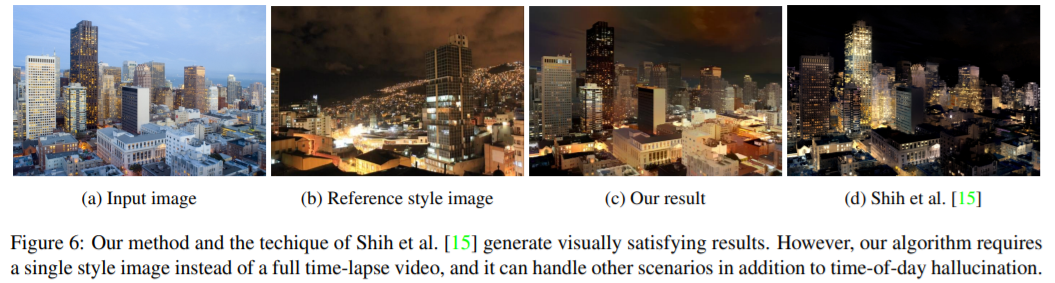

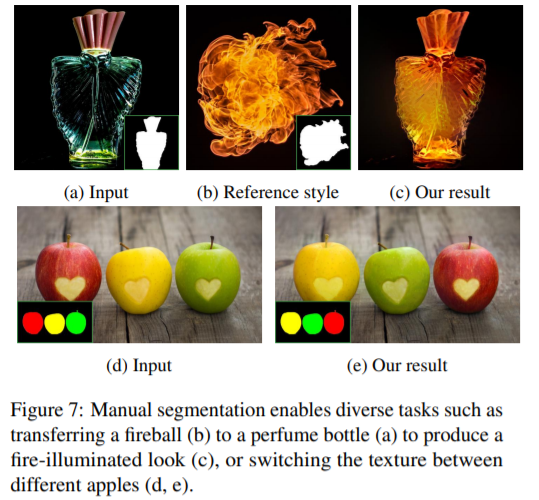

위의 그림 Figure 7은 segmentatic mask를 조정하여 transfer를 제어한 것이다. 매우 만족 스러운 결과를 보여준다.

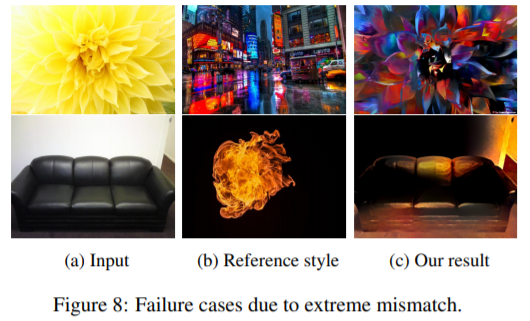

반면, 위의 그림 Figure 8은 전의 그림 Figure 7과 달리 극심한 불일치로 인한 실패를 보여준다.